# Import packages 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
%matplotlib inline
from matplotlib import rcParams
rcParams["axes.formatter.useoffset"] = False
rcParams['axes.formatter.limits'] = -15,15
rcParams['mathtext.fontset'] = 'stix'
rcParams['font.family'] = 'STIXGeneral'
rcParams['xtick.direction']='in'
rcParams['ytick.direction']='in'
import sys
sys.path.pop(0)

'/Users/gks/Dropbox/mypylib/notebooks/GIT'

# Lets import our package 

In [2]:
import rmfit
rmfit

<module 'rmfit' from '/Users/gks/opt/anaconda2/envs/py36/lib/python3.6/site-packages/rmfit-0.1.0-py3.6.egg/rmfit/__init__.py'>

# Lets test it on a dataset with an RV variation + RM effect 

In [3]:
df = pd.read_csv('../data/example/02_xo3/winn2009_xo3.txt',comment='#')
df

,bjd,rv,e_rv
0,2.454865e+06,295.28,8.47
1,2.454865e+06,283.24,9.22
2,2.454865e+06,236.89,8.63
3,2.454865e+06,221.36,8.68
4,2.454865e+06,228.46,8.29
5,2.454865e+06,193.07,8.10
6,2.454865e+06,182.65,8.45
7,2.454865e+06,151.37,8.58
8,2.454865e+06,133.62,8.85
9,2.454865e+06,103.70,9.28


Text(0, 0.5, 'RV [m/s]')

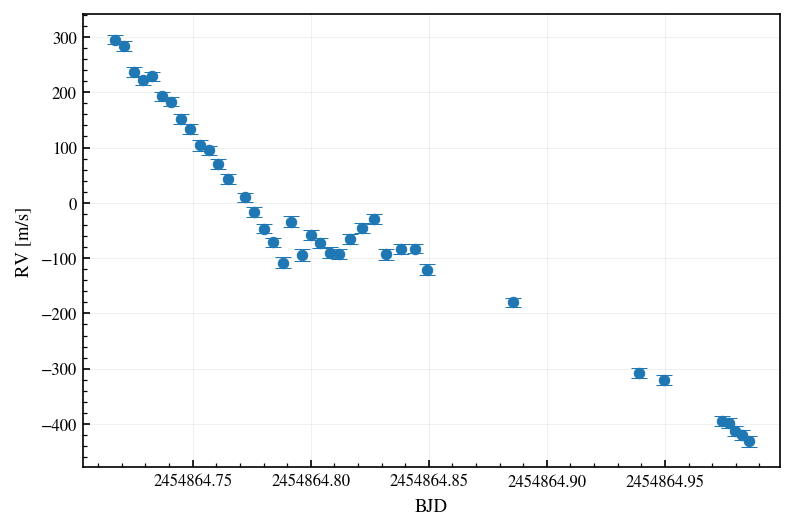

In [4]:
fig, ax = plt.subplots(dpi=150)
ax.errorbar(df.bjd.values,df.rv,df.e_rv,marker='o',lw=0,mew=0.5,capsize=4)
rmfit.utils.ax_apply_settings(ax,ticksize=8)
ax.set_xlabel('BJD')
ax.set_ylabel('RV [m/s]')

### Read priors from file 

In [6]:
f = '../data/example/02_xo3/xo3_priors.dat'
L = rmfit.rmfit.LPFunction(df.bjd.values,df.rv.values,df.e_rv.values,f)
TF = rmfit.rmfit.RMFit(L)

Reading in priorfile from ../data/example/02_xo3/xo3_priors.dat
UPDATE5
   prior          arg1        arg2     label description priortype  fixed
0     NP  2.454450e+06    0.000230     t0_p1       t0_p1     model  False
1     NP  3.191524e+00    0.000007      P_p1        P_p1     model  False
2     UP -1.800000e+02  180.000000    lam_p1      lam_p1     model  False
3     UP  0.000000e+00   30.000000     vsini       vsini     model  False
4     NP  8.420000e+01    0.540000    inc_p1      inc_p1     model  False
5     NP  9.057000e-02    0.000570      p_p1        p_p1     model  False
6     NP  7.070000e+00    0.310000      a_p1        a_p1     model  False
7     NP  3.000000e-01    0.050000        u1          u1     model  False
8     NP  3.000000e-01    0.050000        u2          u2     model  False
9     UP -4.000000e+02  400.000000     gamma       gamma     model  False
10    NP  2.884000e-01    0.003500    ecc_p1      ecc_p1     model  False
11    NP  3.460000e+02    1.300000  omeg

In [7]:
TF.minimize_PyDE(mcmc=False)

Running PyDE Optimizer
Optimized using PyDE
Final parameters:
      labels       centers         lower         upper            pv   center_dist
0      t0_p1  2.454450e+06  2.454450e+06  2.454450e+06  2.454450e+06  4.299730e-05
1       P_p1  3.191524e+00  3.191490e+00  3.191558e+00  3.191525e+00 -9.357400e-07
2     lam_p1  0.000000e+00 -1.800000e+02  1.800000e+02  3.353992e+01 -3.353992e+01
3      vsini  1.500000e+01  0.000000e+00  3.000000e+01  1.560810e+01 -6.081050e-01
4     inc_p1  8.420000e+01  8.150000e+01  8.690000e+01  8.490516e+01 -7.051648e-01
5       p_p1  9.057000e-02  8.772000e-02  9.342000e-02  9.070024e-02 -1.302416e-04
6       a_p1  7.070000e+00  5.520000e+00  8.620000e+00  7.511544e+00 -4.415441e-01
7         u1  3.000000e-01  5.000000e-02  5.500000e-01  3.441793e-01 -4.417926e-02
8         u2  3.000000e-01  5.000000e-02  5.500000e-01  2.973523e-01  2.647677e-03
9      gamma  0.000000e+00 -4.000000e+02  4.000000e+02 -2.843634e+02  2.843634e+02
10    ecc_p1  2.884000e-0

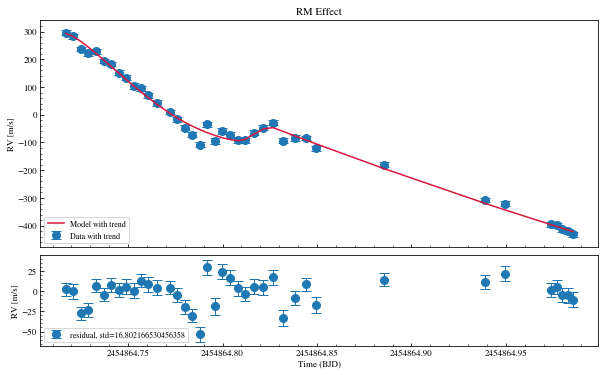

In [8]:
# 
TF.plot_lc(TF.min_pv)

In [9]:
f = '../data/example/02_xo3/xo3_priors.dat'
L = rmfit.rmfit.LPFunction(df.bjd.values,df.rv.values,df.e_rv.values,f)
TF = rmfit.rmfit.RMFit(L)
TF.minimize_PyDE(mcmc=True,mc_iter=500)

Reading in priorfile from ../data/example/02_xo3/xo3_priors.dat
UPDATE5
   prior          arg1        arg2     label description priortype  fixed
0     NP  2.454450e+06    0.000230     t0_p1       t0_p1     model  False
1     NP  3.191524e+00    0.000007      P_p1        P_p1     model  False
2     UP -1.800000e+02  180.000000    lam_p1      lam_p1     model  False
3     UP  0.000000e+00   30.000000     vsini       vsini     model  False
4     NP  8.420000e+01    0.540000    inc_p1      inc_p1     model  False
5     NP  9.057000e-02    0.000570      p_p1        p_p1     model  False
6     NP  7.070000e+00    0.310000      a_p1        a_p1     model  False
7     NP  3.000000e-01    0.050000        u1          u1     model  False
8     NP  3.000000e-01    0.050000        u2          u2     model  False
9     UP -4.000000e+02  400.000000     gamma       gamma     model  False
10    NP  2.884000e-01    0.003500    ecc_p1      ecc_p1     model  False
11    NP  3.460000e+02    1.300000  omeg

No flatchain passed, defaulting to using full chains


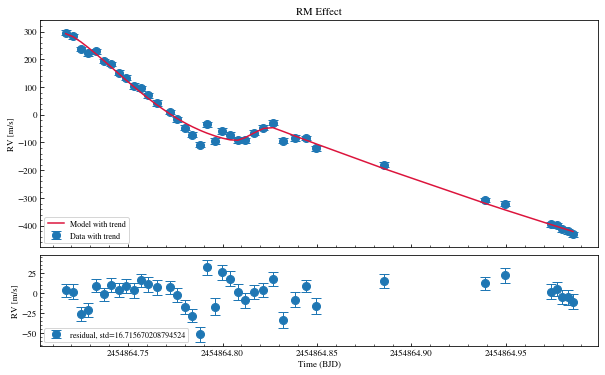

In [10]:
# Plot the MCMC fit
TF.plot_lc_mcmc_fit()

In [11]:
# The min values are recorded in the following attribute
TF.min_pv_mcmc

array([ 2.45444987e+06,  3.19152267e+00,  3.10552477e+01,  1.64588744e+01,
        8.42402330e+01,  9.05804619e-02,  7.11309277e+00,  3.25755160e-01,
        3.28518946e-01, -2.91837935e+02,  2.88164979e-01,  3.44108103e+02,
        6.34699457e+00,  1.48022894e+03])

## Plot chains 

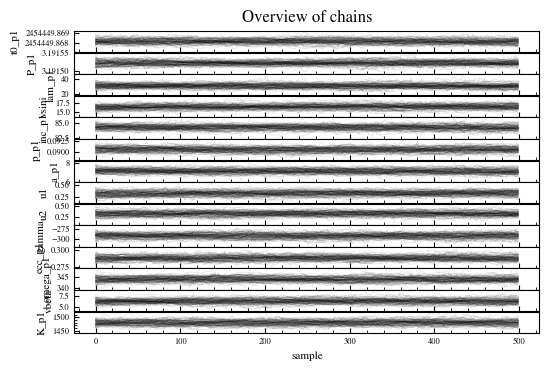

In [12]:
rmfit.mcmc_help.plot_chains(TF.sampler.chain,labels=TF.lpf.ps_vary.labels)

## Plot corner

In [18]:
# Make flatchain and posteriors
burnin_index = 200
chains_after_burnin = TF.sampler.chain[:,burnin_index:,:]
flatchain = chains_after_burnin.reshape((-1,len(TF.lpf.ps_vary.priors)))
df_post = pd.DataFrame(flatchain,columns=TF.lpf.ps_vary.labels)
df_post

,t0_p1,P_p1,lam_p1,vsini,inc_p1,p_p1,a_p1,u1,u2,gamma,ecc_p1,omega_p1,vbeta,K_p1
0,2.454450e+06,3.191520,27.882561,17.235231,84.090179,0.090408,7.096489,0.337033,0.275729,-287.548986,0.285858,345.484628,6.653416,1457.917605
1,2.454450e+06,3.191520,27.882561,17.235231,84.090179,0.090408,7.096489,0.337033,0.275729,-287.548986,0.285858,345.484628,6.653416,1457.917605
2,2.454450e+06,3.191519,27.558921,17.066429,84.055034,0.090292,7.050439,0.315386,0.288769,-290.028395,0.287275,344.708164,6.646118,1461.984909
3,2.454450e+06,3.191519,27.620373,17.057325,84.058695,0.090293,7.050277,0.316389,0.289826,-290.059022,0.287306,344.718435,6.640389,1462.295668
4,2.454450e+06,3.191519,27.656512,17.064577,84.025864,0.090263,7.033864,0.316990,0.291465,-290.054538,0.287320,344.740348,6.561365,1462.433680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2.454450e+06,3.191513,33.784924,15.800066,85.046975,0.091362,7.572407,0.296417,0.318131,-283.272205,0.284218,344.503511,7.098697,1476.428743
29996,2.454450e+06,3.191514,33.194025,16.016501,84.924263,0.091087,7.509175,0.301539,0.318107,-283.877353,0.284585,344.231646,7.060321,1477.368927
29997,2.454450e+06,3.191514,33.194025,16.016501,84.924263,0.091087,7.509175,0.301539,0.318107,-283.877353,0.284585,344.231646,7.060321,1477.368927
29998,2.454450e+06,3.191507,33.842545,15.926911,84.981569,0.091033,7.484611,0.261558,0.313057,-280.934707,0.284673,344.693011,7.164906,1475.640973


In [19]:
# Assess convergence, should be close to 1 (usually within a few percent, if not, then rerun MCMC with more steps)
# This example for example would need a lot more steps, but keeping steps fewer for a quick minimal example
# Usually good to let it run for 10000 - 20000 steps for a 'production run'
rmfit.mcmc_help.gelman_rubin(chains_after_burnin)

array([1.37305363, 1.32427194, 1.29200159, 1.35356295, 1.36750828,
       1.32784245, 1.35115191, 1.29561677, 1.36846008, 1.30011062,
       1.32489578, 1.32369618, 1.29360337, 1.33697734])

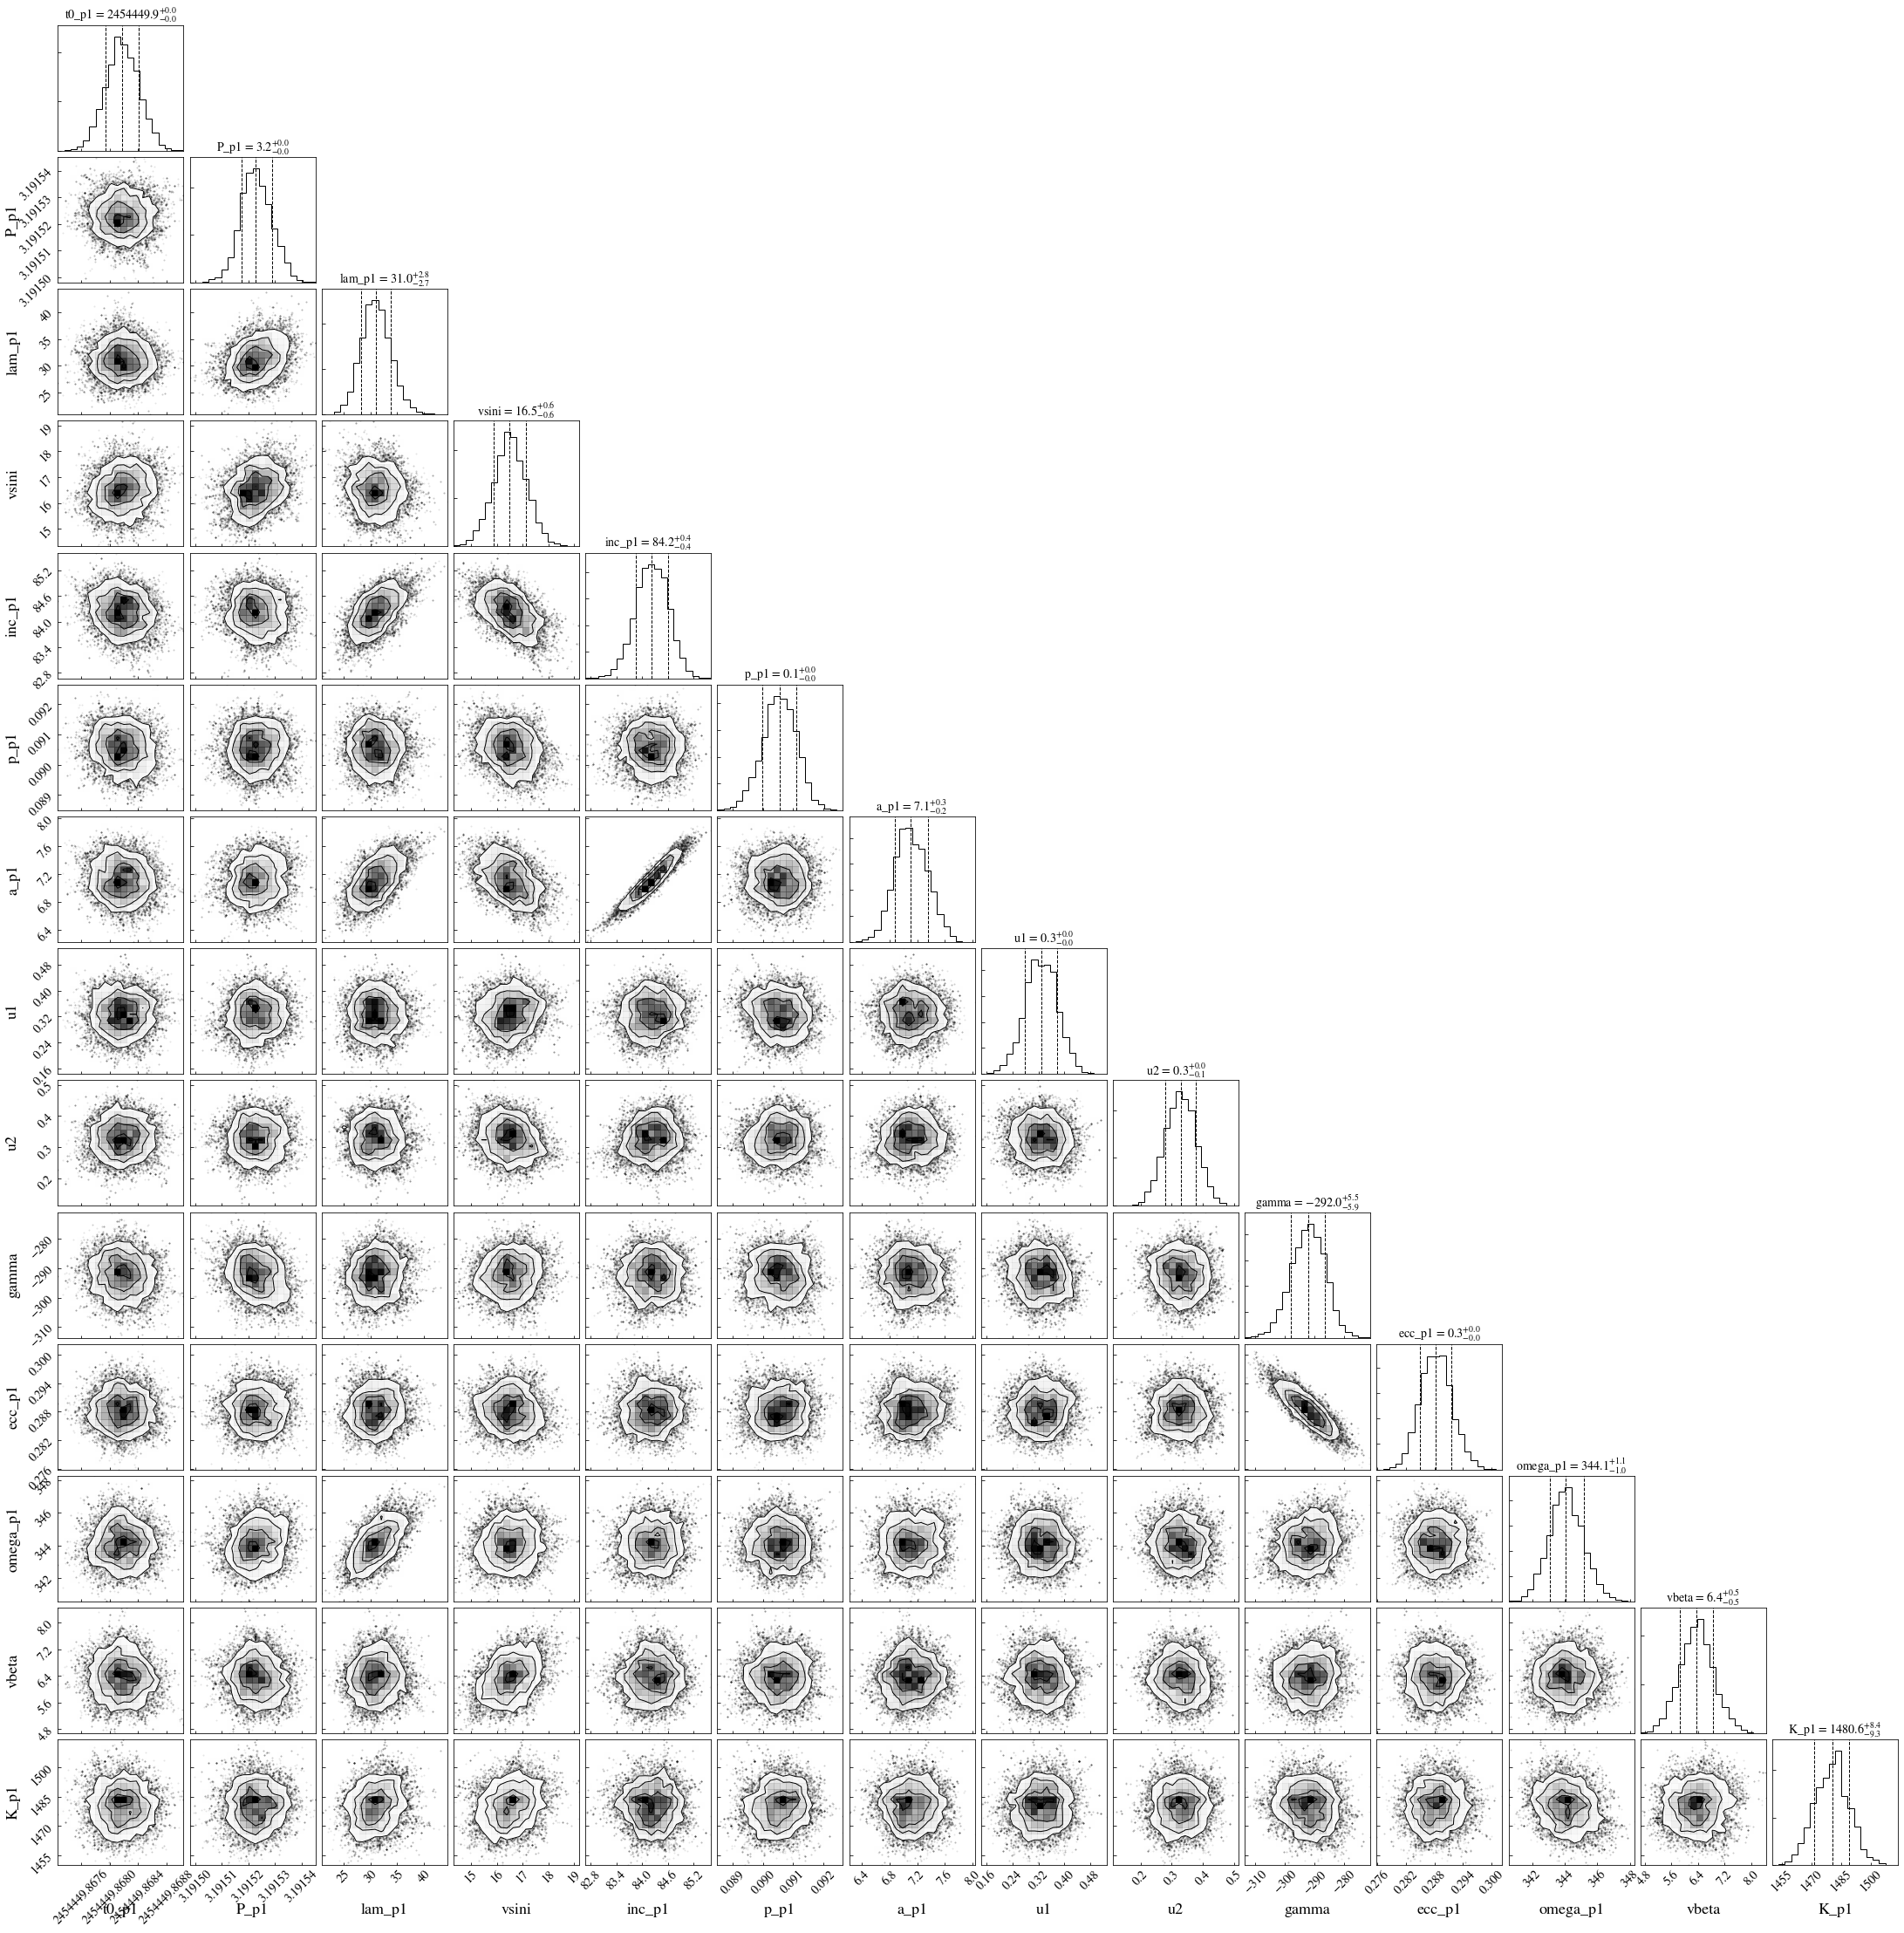

In [20]:
# Plot corner plot
fig = rmfit.mcmc_help.plot_corner(chains_after_burnin,
       show_titles=True,labels=np.array(TF.lpf.ps_vary.descriptions),title_fmt='.1f',xlabcord=(0.5, -0.2))

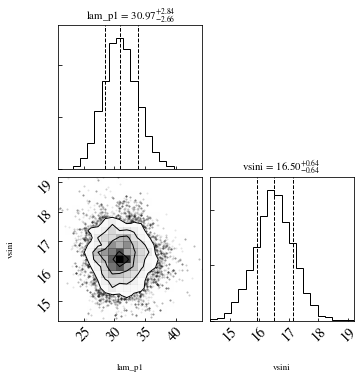

In [21]:
# Narrow down on the lambda and vsini
import corner
fig = corner.corner(df_post[['lam_p1','vsini']],show_titles=True,quantiles=[0.18,0.5,0.84])

In [22]:
# Print median values
df_medvals = TF.get_mean_values_mcmc_posteriors(df_post.values)
df_medvals

,medvals,minus,plus,values,Labels,Description
0,2.454450e+06,0.000232,0.000237,$2454449.86818_{-0.00023}^{+0.00024}$,t0_p1,t0_p1
0,3.191523e+00,0.000005,0.000006,$3.1915227_{-0.000005}^{+0.000006}$,P_p1,P_p1
0,3.096960e+01,2.662325,2.836511,$31.0_{-2.7}^{+2.8}$,lam_p1,lam_p1
0,1.649998e+01,0.638382,0.640969,$16.5_{-0.64}^{+0.64}$,vsini,vsini
0,8.422746e+01,0.380867,0.376570,$84.23_{-0.38}^{+0.38}$,inc_p1,inc_p1
0,9.055209e-02,0.000567,0.000558,$0.09055_{-0.00057}^{+0.00056}$,p_p1,p_p1
0,7.104664e+00,0.226185,0.255780,$7.1_{-0.23}^{+0.26}$,a_p1,a_p1
0,3.288547e-01,0.049614,0.048507,$0.329_{-0.050}^{+0.049}$,u1,u1
0,3.291700e-01,0.050488,0.048349,$0.329_{-0.050}^{+0.048}$,u2,u2
0,-2.919559e+02,5.930620,5.476842,$-292.0_{-5.9}^{+5.5}$,gamma,gamma


# Plotting resulting MCMC fit 

Sampling, i= 0
Sampling, i= 100
Sampling, i= 200
Sampling, i= 300


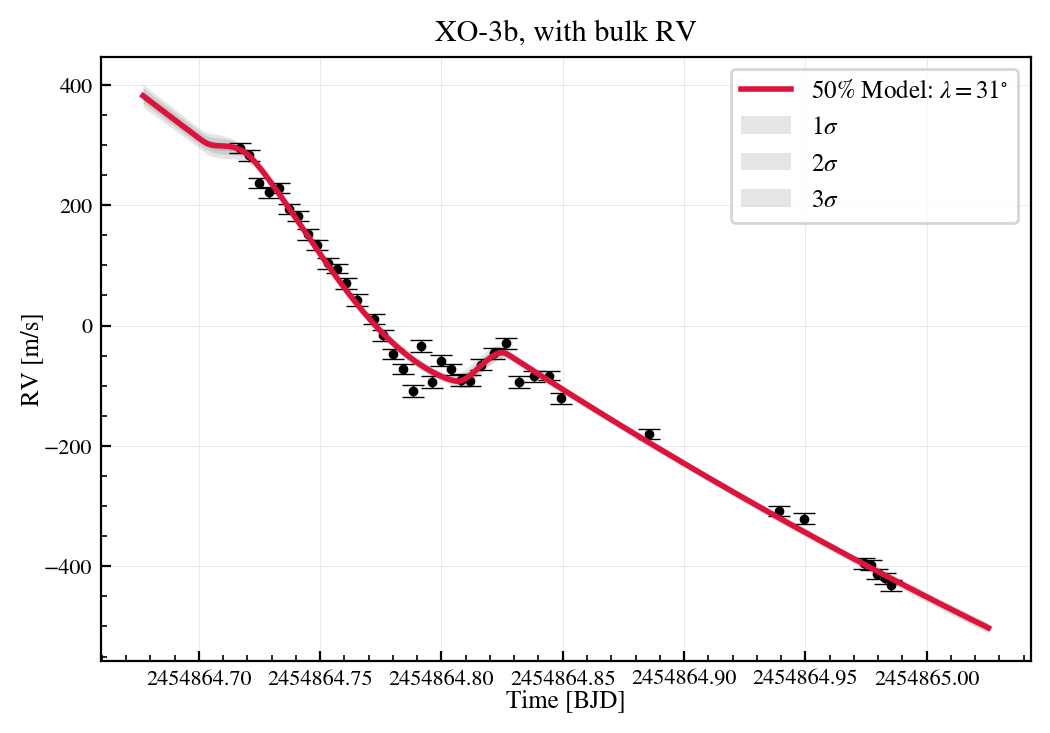

In [24]:
TITLE = 'XO-3b, with bulk RV'
NUMMODELS = 400
shadecolor="black"

###################
times1 = np.linspace(TF.lpf.data['x'][0]-0.02,TF.lpf.data['x'][-1]+0.02,500)
pv_50 = np.percentile(flatchain,[50],axis=0)[0]
t1_mod = np.linspace(times1.min()-0.02,times1.max()+0.02,300)
rv_50 = TF.lpf.compute_total_model(pv_50,t1_mod)

# Plot random samples
fig, ax = plt.subplots(dpi=200)

#################
# Plot data
#################
markercolor="black"
ax.errorbar(TF.lpf.data['x'],TF.lpf.data['y'],TF.lpf.data['error'],
            marker='o',elinewidth=0.5,capsize=4,lw=0,mew=0.5,color=markercolor,markersize=3)
ax.plot(t1_mod,rv_50,color="crimson",
        label=r'50% Model: $\lambda=${:0.0f}'.format(pv_50[2])+'$^{\circ}$',lw=2.,zorder=10)

#################
# Sample models
#################
mmodel1 = []
for i in range(NUMMODELS):
    if i%100 == 0: print("Sampling, i=",i)
    idx = np.random.randint(0, flatchain.shape[0])
    m1 = TF.lpf.compute_total_model(flatchain[idx],times=t1_mod)
    mmodel1.append(m1)
mmodel1 = np.array(mmodel1)
#################

ax.fill_between(t1_mod,np.quantile(mmodel1,0.16,axis=0),np.quantile(mmodel1,0.84,axis=0),
                alpha=0.1,color=shadecolor,lw=0,label='1$\sigma$',zorder=-1)
ax.fill_between(t1_mod,np.quantile(mmodel1,0.02,axis=0),np.quantile(mmodel1,0.98,axis=0),
                alpha=0.1,color=shadecolor,lw=0,label='2$\sigma$',zorder=-1)
ax.fill_between(t1_mod,np.quantile(mmodel1,0.0015,axis=0),np.quantile(mmodel1,0.9985,axis=0),
                alpha=0.1,color=shadecolor,lw=0,label='3$\sigma$',zorder=-1)
ax.legend(loc='upper right')
ax.set_xlabel('Time [BJD]',labelpad=0)
ax.set_ylabel('RV [m/s]',labelpad=0)
ax.set_title(TITLE)
rmfit.utils.ax_apply_settings(ax,ticksize=8)